# MNIST Handwritten Digits Dataset

****Table of Contents****:

    - Importing Libraries and Data
    - Data Flattening and Normalization
    - Basic Model
        - Confusion Matrix and Error Analysis
    - Advanced Model
    - CNN Model
        - Test Run on New Images
        - Error Analysis
    - ResNet Model
    - Conclusions

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, ReLU, BatchNormalization, Activation, Add, Input, ZeroPadding2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import cv2
import os

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

In [7]:
#Dataset info
print(f"Train Set size: {len(X_train)}\nTest Set size: {len(X_test)}\nSample image shape:{X_train[0].shape}")

Train Set size: 60000
Test Set size: 10000
Sample image shape:(28, 28)


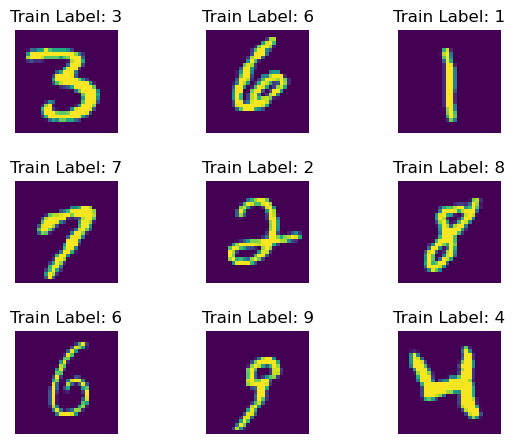

In [4]:
#Image preview
figures = plt.figure()
for i in range (9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[12+i])
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Train Label: {y_train[12+i]}")
plt.tight_layout(pad=2)
plt.savefig("images/SamplePreview.png", bbox_inches="tight")
plt.show()

## Data Flattening and Normalization

In [3]:
#Unrolling and normalizing image data
X_train_flattened = X_train.reshape(len(X_train),28*28) / 255
X_test_flattened = X_test.reshape(len(X_test),28*28) / 255

In [3]:
#Normalizing original data
X_train = X_train / 255
X_test = X_test / 255

In [6]:
#Size check
print(f"Flattened Train Set shape: {X_train_flattened.shape}\nFlattened Test Set size: {X_test_flattened.shape}")

Flattened Train Set shape: (60000, 784)
Flattened Test Set size: (10000, 784)


## Basic Model

In [7]:
#Building Basic NN model
model = Sequential([
    Dense(units=10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\jom4n\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8164 - loss: 0.7094
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9136 - loss: 0.3093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9226 - loss: 0.2817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2691


In [8]:
y_preds = model.predict(X_test_flattened)
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9140 - loss: 0.3034


[0.27086639404296875, 0.9236000180244446]

In [9]:
#Storing predictions into array using argmax
y_preds = np.array([np.argmax(i) for i in y_preds])

In [10]:
y_preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Confusion Matrix and Error Analysis

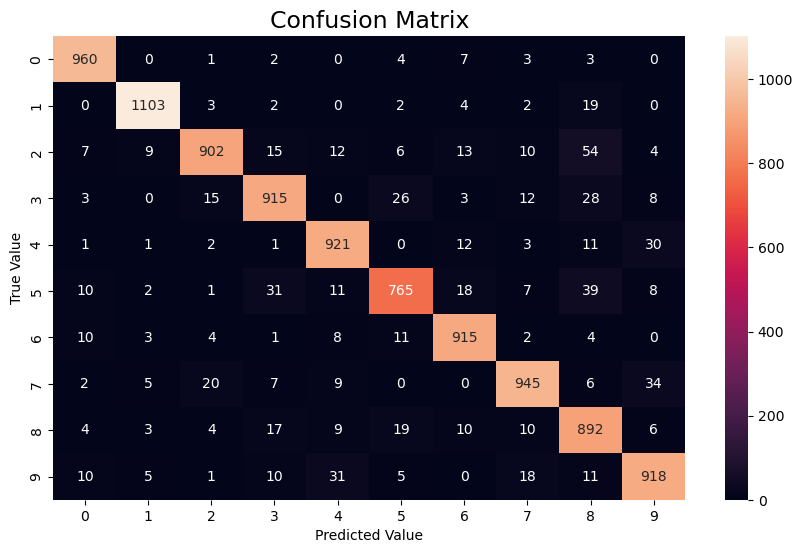

In [11]:
#Confusion Matrix for error analysis
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title("Confusion Matrix", fontsize=17)
plt.tight_layout(pad=6)
plt.savefig("images/Conf_Matrix.png", bbox_inches="tight")
plt.show()

In [12]:
#Checking the fraction of missclassifications for each digit
miss_class_list = []
#cm = cm.numpy()
for i in range(10):
    cols_before_sum = np.sum(cm[i,0:i])
    cols_after_sum = np.sum(cm[i,i:])
    miss_class_list.append( (cols_before_sum + cols_after_sum) / cm[i,i] )

In [13]:
miss_class_list = (np.array(miss_class_list) - 1) * 100
miss_class_list

array([ 2.08333333,  2.9011786 , 14.41241685, 10.38251366,  6.62323561,
       16.60130719,  4.69945355,  8.78306878,  9.19282511,  9.91285403])

We see that our NN makes the most mistakes on the digits:
- `2` (13% missclassified)
- `8` (12% missclassified)
- `3` (13% missclassified),

respectively.

## Advanced Model

In [10]:
#Building More Advanced NN model
#print('---------------------------------------------------------\nTRAIN SET:\n---------------------------------------------------------')
model2 = Sequential([
    Flatten(input_shape=(28,28)), #using Flatten layear instead of manually flattening data
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\jom4n\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Configuring Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Storing history for later plotting
history = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8696 - loss: 0.4243 - val_accuracy: 0.9622 - val_loss: 0.1238
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9692 - loss: 0.0984 - val_accuracy: 0.9733 - val_loss: 0.0868
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0679 - val_accuracy: 0.9716 - val_loss: 0.0948
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0532 - val_accuracy: 0.9738 - val_loss: 0.0949
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9764 - val_loss: 0.0837
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9884 - loss: 0.0358 - val_accuracy: 0.9802 - val_loss: 0.0719
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9755 - val_loss: 0.0966
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9914 - loss: 0.0256 - 

In [13]:
#Saving history into a file
with open("files/history_log_1.txt", "wb") as f:
    pickle.dump(history.history, f)

In [14]:
#Convert into dataframe for loss-epoch plots
history = pd.DataFrame(history.history)

<Figure size 1000x700 with 0 Axes>

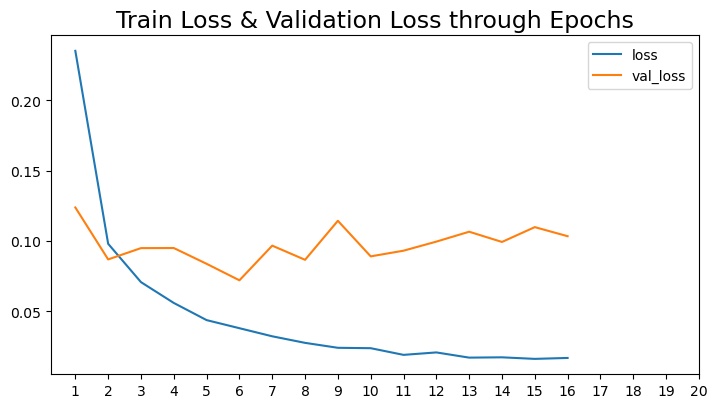

In [15]:
#Plotting Loss through Epochs
fig = plt.figure(figsize=(10,7))
(history[['loss', 'val_loss']]).plot(figsize=(8,5))
plt.title("Train Loss & Validation Loss through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks])
plt.savefig("images/Loss_Val_Loss.png", bbox_inches="tight")
plt.show()

<Figure size 1000x700 with 0 Axes>

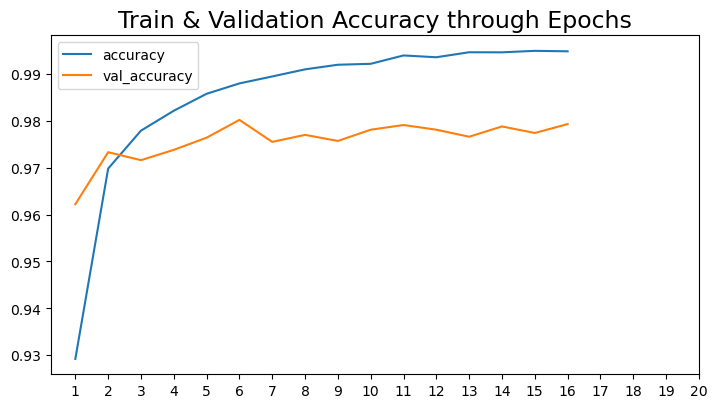

In [16]:
#Plotting Accuracy through Epochs
fig = plt.figure(figsize=(10,7))
(history[['accuracy', 'val_accuracy']]).plot(figsize=(8,5))
plt.title("Train & Validation Accuracy through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks])
plt.savefig("images/Acc_Val_Acc.png", bbox_inches="tight")
plt.show()

We can see that after approximately the 6th epoch, the validation loss is (non-monotonically) rising, while the training loss is falling. This is a textbook case of overfitting. Therefore, for this particular model architecture, we will go with 6 epochs; in fact, the `EarlyStopping`-associated callback has already saved the best performing weights for us.

In [17]:
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds = model2.predict(X_test, verbose=True)
model2.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0861


[0.07192617654800415, 0.9801999926567078]

## CNN Model

We attempt the same classification using a simple Convolutional Neural Network Model implemented through Keras' Functional API. For this particular model, the same could be accomplished by using a Sequential Model, but it is a good exercise to use the Funtional API.

The CNN architecture will be as follows:
- Input Layer ($28 \times 28 \times 1$ grayscale image),
<br>
<br>
- Conv2D Layer (64 filters of size $3\times3$), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $2\times2$),
<br>
<br>
- Conv2D Layer (64 filters of size $3\times3$), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $2\times2$),
<br>
<br>
- Conv2D Layer (64 filters of size $3\times3$), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $2\times2$),
<br>
<br>
- Flatten Layer,
- FC Dense Layer (64 units, `relu` activation),
- FC Dense Layer (32 units, `relu` activation),
<br>
<br>
- Dense Output Layer (10 units, `softmax` activation).

In [19]:
#Constructing CNN using Functional API
input_img = tf.keras.Input(shape=(28,28,1))

#1st Convolution Layer
Z1 = Conv2D(filters=64, kernel_size=(3,3))(input_img)
A1 = ReLU()(Z1)
P1 = MaxPool2D(pool_size=(2,2))(A1)

#2nd Convolution Layer
Z2 = Conv2D(filters=64, kernel_size=(3,3))(P1)
A2 = ReLU()(Z2)
P2 = MaxPool2D(pool_size=(2,2))(A2)

#3rd Convolution Layer
Z3 = Conv2D(filters=64, kernel_size=(3,3))(P2)
A3 = ReLU()(Z3)
P3 = MaxPool2D(pool_size=(2,2))(A3)

#Flatten Layer
F = Flatten()(P3)

#1st Fully Connected Layer
D1 = Dense(units=64, activation='relu')(F)

#2nd Fully Connected Layer
D2 = Dense(units=32, activation='relu')(D1)

#Output Layer (softmax dense layer)
outputs = Dense(units=10, activation='softmax')(D2)

model_cnn = tf.keras.Model(inputs=input_img, outputs=outputs)

In [20]:
#Checking model summary
model_cnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

It needs to be kept in mind that our output data (`y_train`) contains the integer of the digit that is associated with an image; `y_train` is **not** one-hot encoded! For this reason, we use the 'sparse' version of the `'categorical_crossentropy'` loss function. As a reminder, sparse functions use the target data (ground truth) as **integer labels**: 0, 1, 2, 3, 4, etc., while non-sparse functions use the target data as **one-hot labels**: [1,0,0], [0,1,0], [0,0,1], or similar.

In [103]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_cnn = model_cnn.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9810 - val_loss: 0.0600
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9873 - val_loss: 0.0462
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.9871 - val_loss: 0.0447
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9886 - val_loss: 0.0468
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9951 - loss: 0.0166 - val_accuracy: 0.9884 - val_loss: 0.0480
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9886 - val_loss: 0.0411
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.9886 - val_loss: 0.0436
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9962 -

In [104]:
#Saving history into a file
with open("files/history_log_CNN.txt", "wb") as f:
    pickle.dump(history_cnn.history, f)

#Convert into dataframe for loss-epoch plots
history_cnn = pd.DataFrame(history_cnn.history)

<Figure size 1000x700 with 0 Axes>

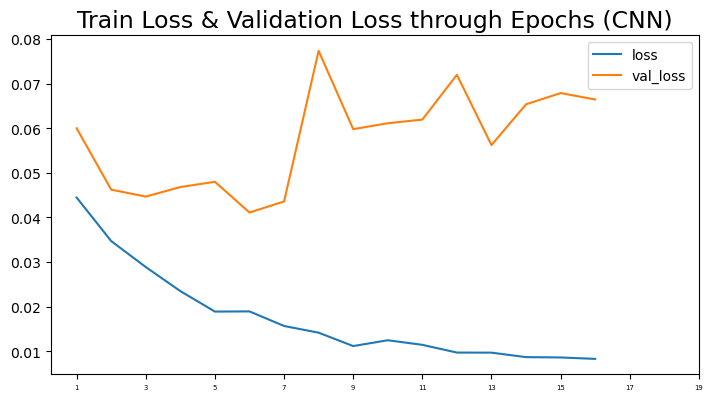

In [140]:
#Plotting loss through different epochs
fig = plt.figure(figsize=(10,7))
(history_cnn[['loss', 'val_loss']]).plot(figsize=(8,5))
plt.title("Train Loss & Validation Loss through Epochs (CNN)", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20,2)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks], fontsize=5)
plt.savefig("images/Loss_Val_Loss_CNN.png", bbox_inches="tight")
plt.show()

<Figure size 1000x700 with 0 Axes>

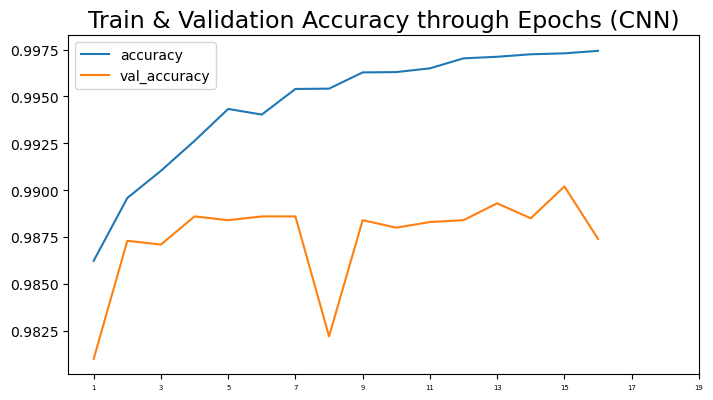

In [141]:
#Plotting accuracy through different epochs
fig = plt.figure(figsize=(10,7))
(history_cnn[['accuracy', 'val_accuracy']]).plot(figsize=(8,5))
plt.title("Train & Validation Accuracy through Epochs (CNN)", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20,2)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks], fontsize=5)
plt.savefig("images/Acc_Val_Acc_CNN.png", bbox_inches="tight")
plt.show()

In [178]:
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds_cnn = model_cnn.predict(X_test, verbose=True)
model_cnn.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9869 - loss: 0.0498


[0.041092582046985626, 0.9886000156402588]

In [108]:
#Saving model
with open("files/Digit_CNN_model.pickle", 'wb') as f:
    pickle.dump(model_cnn, f)

In [4]:
#Loading model
with open("files/Digit_CNN_model.pickle", 'rb') as f:
    model_cnn_loaded = pickle.load(f)

### Test Run on New Images

#### Single Image

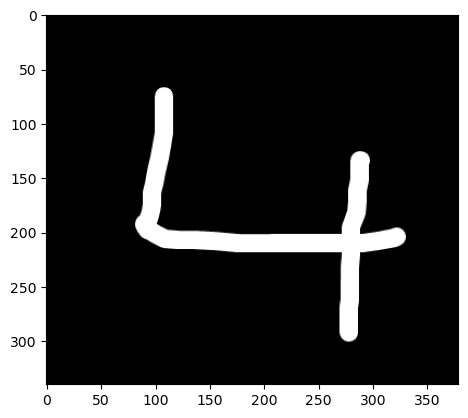

In [115]:
#Loading New Image
img = cv2.imread('test_images/digit4.png')
plt.imshow(img)
plt.show()

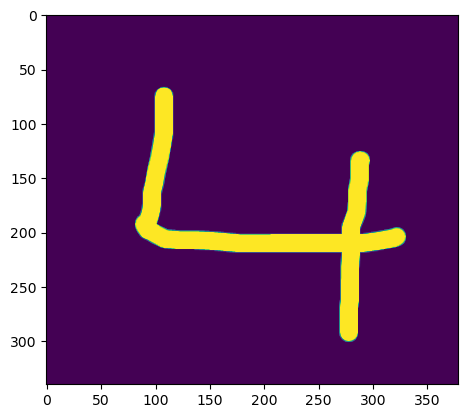

In [116]:
#Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

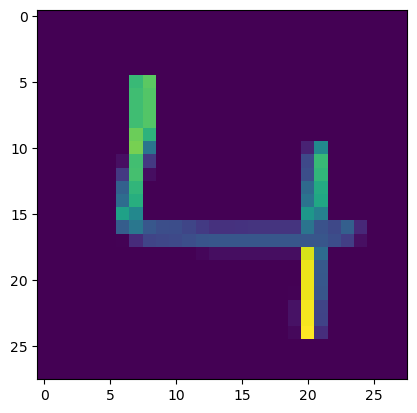

In [117]:
#Resizing and scaling
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
scaled = tf.keras.utils.normalize(resized, axis=1)
plt.imshow(scaled)
plt.show()

In [118]:
#Reshaping array
img_final = np.array(scaled).reshape(1, 28, 28)

In [123]:
print(f"Prediction: {np.argmax((model_cnn_loaded.predict(img_final)))}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: 4


#### All New Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


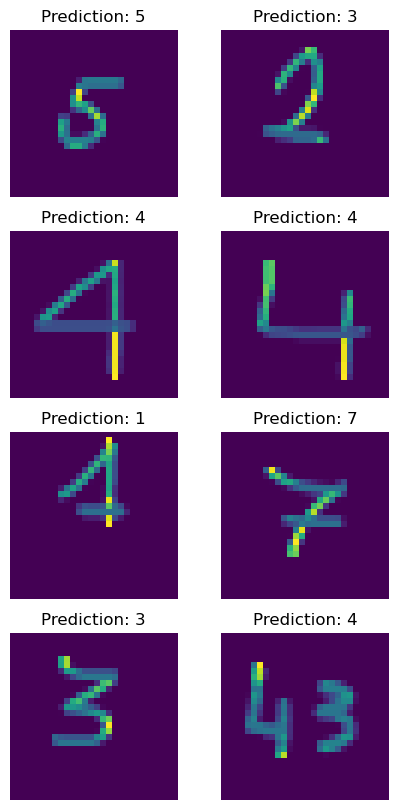

In [135]:
# Loading all self-created digits and testing model performance

fig = plt.figure(figsize=(5,10))
digit_num = 1
while os.path.isfile(f"test_images/digit{digit_num}.png"):
    try:
        img = cv2.imread(f"test_images/digit{digit_num}.png")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)
        img = tf.keras.utils.normalize(img, axis=1)  
        img_reshape = np.array(img).reshape(1, 28, 28)
        prediction = np.argmax(model_cnn_loaded.predict(img_reshape))

        plt.subplot(4, 2, digit_num)
        plt.grid(False)
        plt.axis('off')
        plt.imshow(img)
        plt.title(f"Prediction: {prediction}")
    except:
        print("Error!")
    finally:
        digit_num += 1

Our model performs very well! With more training epochs and a bit more patience, we could probably further improve its accuracy! The last image is a curious test to see what would be the prediction of the model given a two-digit number. As it is visible, it recognized only the first digit in the image.

### Error Analysis

In [7]:
#Covnerting predictions into numpy arrays of type uint8
y_preds_cnn = [np.argmax(i) for i in y_preds_cnn]
y_preds_cnn = np.array(y_preds_cnn)
y_preds_cnn = y_preds_cnn.astype('uint8')

In [8]:
#Retrieving indices of missclassified images
miss_class_cnn_index = np.where(y_preds_cnn != y_test)
miss_class_cnn_index = miss_class_cnn_index[0]

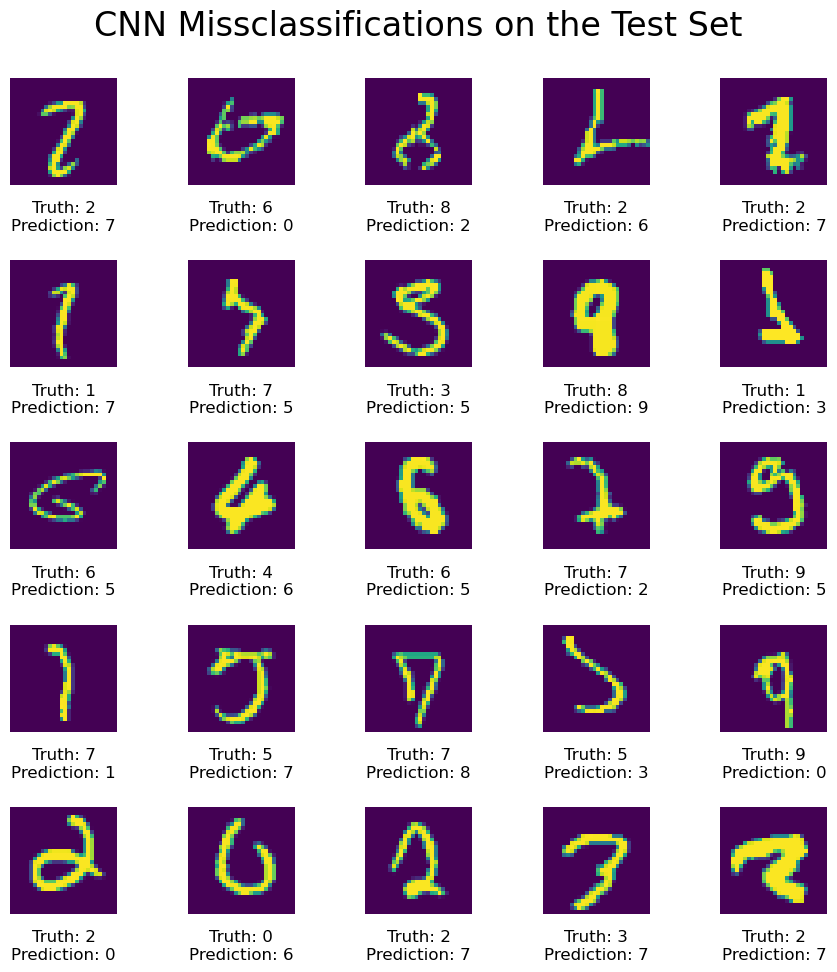

In [9]:
#Plotting 25 missclassifications
fig = plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(X_test[miss_class_cnn_index[i]])
    plt. suptitle("CNN Missclassifications on the Test Set", fontsize=24)
    plt.tight_layout(pad=2)
    plt.title(f"Truth: {y_test[miss_class_cnn_index[i]]}\nPrediction: {y_preds_cnn[miss_class_cnn_index[i]]}", y=-0.5)
    plt.savefig("images/CNN_Miss.png", bbox_inches='tight')

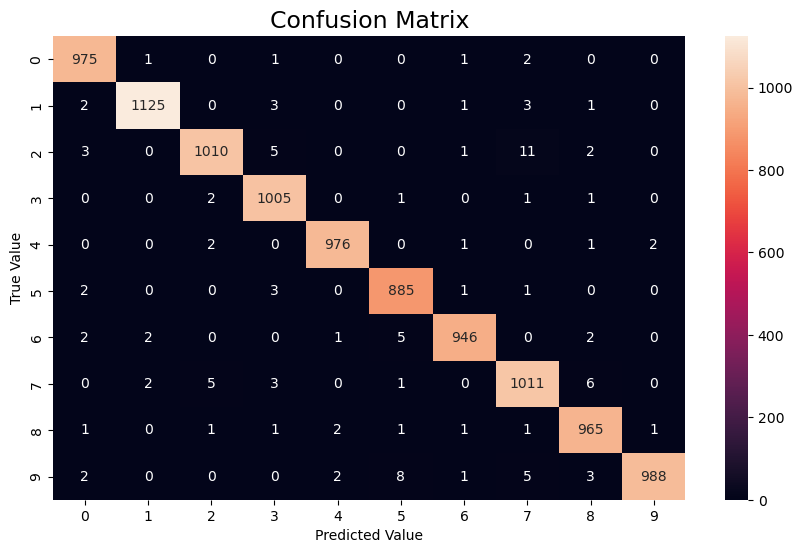

In [210]:
#Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_cnn)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title("Confusion Matrix", fontsize=17)
plt.tight_layout(pad=6)
plt.savefig("images/Conf_Matrix_CNN.png", bbox_inches="tight")
plt.show()

The most problematic case of classification seems to be the digit `2`, which the model missclassified as a `7` on 11 occasions.

In [208]:
#Fraction of missclassifications
print(f"Fraction of missclassifications on test set: {len(miss_class_cnn_index)} / {len(X_test)} = {len(miss_class_cnn_index)/len(X_test)}")

Fraction of missclassifications on test set: 114 / 10000 = 0.0114


... which is only 1.14% of all samples.

## ResNet Model

In the final part of our model-building, we tackle the image classification using a Deep Residual Neural Network. The architecture of the Residual Network is comprised of different stages such that each stage is constitued of a number of convolutional and identity blocks. The main idea of convolutional and Identity Blocks inside of a Residual Network is that they supply the activations of the current layer to layers that are further than the neigbouring; we say that a *skip connection* is employed. Roughly speaking, this makes it easier for the layers inbetween to learn the identity function, thus saving the Network from exploding or vanishing gradients and speeding up computation.

The Convolutional and Identity blocks differ in that the Convolutional Block applies a convolution to the skip-connection line before giving the activation information to layers further down the line, while the Identity Block simply copies the activations further down the line without modifying them in any way. Since we are dealing with image data, we need to keep an eye on the dimensions. Identity Blocks require that the image data that is shortcutted down the network is of the same dimensions as the image data that it will reunify with. Convolutional Blocks, on the other hand, allow us to adjust the padding of the convolution operation so as to fine tune the dimensions that make this reunificaiton possible.

By stacking many stages of Convolutional and Identity Block arrangements, we construct a Residual Neural Network. The Network employed in this project is a ResNet50 that has been made shallower due to the small dimensions of the images.

Since the training of a ResNet requires substantial computational power, the training of this model has been done inside a Kaggle kernel that provides us with 2 x Nvidia Tesla GPUs for training; after that, the model has been loaded here.

In [18]:
def identity_block(X, f, filters, initializer=random_uniform):
    
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = f, strides = (1,1), padding = 'same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    
    # Reunification of shortcut and main path
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X) 

    return X

In [13]:
def convolutional_block(X, f, filters, s = 2, initializer=glorot_uniform):
    F1, F2, F3 = filters
    
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding='same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X) 

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    
    #Shortcut path
    X_shortcut = Conv2D(filters = F3, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
    

    # Reunification of shortcut and main path
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [14]:
def ResNet(input_shape = (28, 28, 1), classes = 10, training=False):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)

    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
    
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
 
    # Avgerage Pooling Stage
    X = AveragePooling2D(pool_size=(2,2))(X)

    # Output Layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)

    
    model = Model(inputs = X_input, outputs = X)

    return model

In [15]:
model = ResNet(input_shape = (28,28, 1), classes = 10)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 34, 34, 1) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_86 (Conv2D)  │ (None, 14, 14,    │      3,200 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_86[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_80       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 64)  │          0 │ activation_80[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_87 (Conv2D)  │ (None, 6, 6, 64)  │      4,160 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 6, 64)  │        256 │ conv2d_87[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_81       │ (None, 6, 6, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_88 (Conv2D)  │ (None, 6, 6, 64)  │     36,928 │ activation_81[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 6, 64)  │        256 │ conv2d_88[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_82       │ (None, 6, 6, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_89 (Conv2D)  │ (None, 6, 6, 256) │     16,640 │ activation_82[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_90 (Conv2D)  │ (None, 6, 6, 256) │     16,640 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 6, 256) │      1,024 │ conv2d_89[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 6, 256) │      1,024 │ conv2d_90[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (None, 6, 6, 256) │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_83       │ (None, 6, 6, 256) │          0 │ add_26[0][0]      │
│ (Activation)        │                   │            │                 

 Total params: 8,593,162 (32.78 MB)

 Trainable params: 8,562,570 (32.66 MB)

 Non-trainable params: 30,592 (119.50 KB)

None


In [42]:
#Compiling model and fitting for 40 epochs
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_ResNet = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [ ]:
#Saving history into a file
with open("files/history_log_ResNet.txt", "wb") as f:
    pickle.dump(history_ResNet.history, f)

In [ ]:
#Saving model
with open("files/Digit_ResNet_model.pickle", 'wb') as f:
    pickle.dump(model, f)

In [4]:
#Loading model from Kaggle kernel
with open("files/Digit_ResNet_model.pickle", 'rb') as f:
    model_ResNet_loaded = pickle.load(f)

In [7]:
#Evaluating ResNet model on test net
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds_ResNet = model_ResNet_loaded.predict(X_test, verbose=True)
model_ResNet_loaded.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 199ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 196ms/step - accuracy: 0.9895 - loss: 0.0330


[0.02480986900627613, 0.9922999739646912]

The modified ResNet50 model outperforms all of the models that have been utilised thus far.

## Conclusions

We have successfully tackled the MNIST Digit Dataset in three different ways using Deep Learning. We have built four Neural Networks:
- a Basic and shallow model that gives 0.926 accuracy on the test set,
- a More Advanced and deeper model that gives 0.980 accuracy on the test set,
- a Convolutional Model that gives 0.989 accuracy on the test set,
- a Residual Network that gives 0.992 accuracy on the test set.

We have furthermore carried out error analysis on both the Basic and CNN Model, as well as tested the CNN model with new self-made image data.

The results are satisfactory.